In [1]:
pip install ktrain

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

In [3]:
df = pd.read_csv('SMSSpamCollection.csv', sep = '\t', names = ['label', 'text'])

In [4]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


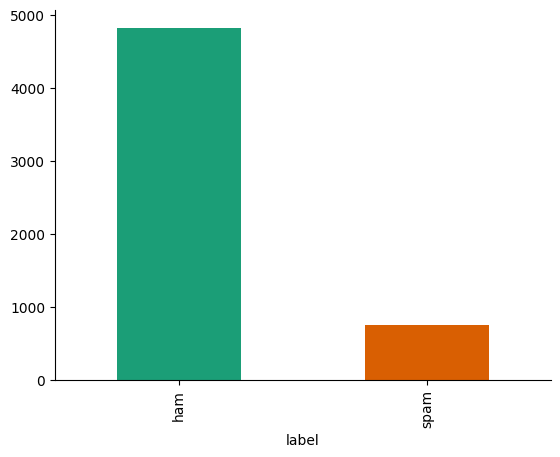

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df.shape

(5572, 2)

In [7]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size = 0.2, random_state = 0)

In [8]:
data_train.shape, data_test.shape

((4457, 2), (1115, 2))

In [9]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(
    train_df = data_train,
    text_column = 'text',
    label_columns = 'label',
    val_df = data_test,
    preprocess_mode = 'bert' ) # or distilbert

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [10]:
## use 'distilbert' if you want
model = text.text_classifier(name = 'bert', # or distilbert
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [11]:
# here we have taken batch size as 6 as from the documentaion it is recommend to use this with maxlen as 500
learner = ktrain.get_learner(model = model, train_data = (X_train, y_train), val_data = (X_test, y_test), batch_size = 6)

In [12]:
learner

In [13]:
# learner.lr_find(show_plot = True, max_epochs = 2)

In [14]:
learner.fit_onecycle(lr = 2e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('bertspam-classifier')



begin training using onecycle policy with max lr of 2e-05...
743/743 [==============================] - 527s 668ms/step - loss: 0.0925 - accuracy: 0.9672 - val_loss: 0.0166 - val_accuracy: 0.9964


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('bertspam-classifier')

In [16]:
msg1 = ['Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&Cs apply 08452810075over18s']
msg2 = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."]

In [17]:
predictor.predict(msg1)

['spam']

In [18]:
predictor.predict(msg2)

['ham']

In [19]:
!zip -r /content/bertspam-classifier.zip /content/bertspam-classifier To_Zip

	zip warning: name not matched: To_Zip
  adding: content/bertspam-classifier/ (stored 0%)
  adding: content/bertspam-classifier/tf_model.preproc (deflated 48%)
  adding: content/bertspam-classifier/tf_model.h5 (deflated 18%)
